# Problem Statement :-

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.


## Lifecycle In A Data Science Project

    1. Data Analysis
    2. Feature Engineering
    3. Feature Selection
    4. Model Building
    5. Model Deployment



In [1]:
#We need to load all required libraries first
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from collections import Counter

In [2]:
#Setting the working directory
os.chdir("D:\Car_Fair_Prediction")
print(os.getcwd())

D:\Car_Fair_Prediction


In [3]:
#Loading the dataframe to work on
df = pd.read_csv("D:/Car_Fair_Prediction/train_cab.csv")
df_test = pd.read_csv("D:/Car_Fair_Prediction/test.csv")

## Understanding the Data :-

In [4]:
#Checking first 5 rows of train dataset to get an overview of the trin data
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
#Checking first 5 rows of test dataset to get an overviw of the test data
df_test.head() 

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
#Checking the number of rows and columns present in the train and test dataset
print("Shape of train dataset" ,df.shape)
print("Shape of test dataset", df_test.shape)

Shape of train dataset (16067, 7)
Shape of test dataset (9914, 6)


## Exploratory Data Analysis :-


In Exploratory Data Analysis We will Analyze To Find out the below stuff

    Missing Values
    All The Numerical Variables
    Distribution of the Numerical Variables
    Categorical Variables
    Outliers
    Relationship between independent and dependent feature



In [7]:
#Extract the data types of all the features in Dataset.
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [8]:
# Convert fare_amount from object to numeric
df['fare_amount']= pd.to_numeric(df['fare_amount'],errors ='coerce') 
#Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [9]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],errors='coerce')


In [10]:
df.isnull().sum()

fare_amount          25
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [11]:
#After converting to datetime datatype only one column is having NaN,we can drop that row
df.dropna(subset=['pickup_datetime'],inplace = True)

In [12]:
#we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_Dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_minute'] = df['pickup_datetime'].dt.minute

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16066 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        16041 non-null  float64            
 1   pickup_datetime    16066 non-null  datetime64[ns, UTC]
 2   pickup_longitude   16066 non-null  float64            
 3   pickup_latitude    16066 non-null  float64            
 4   dropoff_longitude  16066 non-null  float64            
 5   dropoff_latitude   16066 non-null  float64            
 6   passenger_count    16011 non-null  float64            
 7   pickup_year        16066 non-null  int64              
 8   pickup_month       16066 non-null  int64              
 9   pickup_date        16066 non-null  int64              
 10  pickup_hour        16066 non-null  int64              
 11  pickup_Dayofweek   16066 non-null  int64              
 12  pickup_minute      16066 non-null  int64      

#### Here we can see that the passenger_count feature's data type is float we will convert it into Int after the Missing value handling step

In [14]:
df.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
pickup_year           0
pickup_month          0
pickup_date           0
pickup_hour           0
pickup_Dayofweek      0
pickup_minute         0
dtype: int64

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17,0,26
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16,1,52
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0,3,35
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4,5,30
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7,1,51


In [16]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'],errors='coerce')


In [17]:
#we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
df_test['pickup_year'] = df_test['pickup_datetime'].dt.year
df_test['pickup_month'] = df_test['pickup_datetime'].dt.month
df_test['pickup_date'] = df_test['pickup_datetime'].dt.day
df_test['pickup_hour'] = df_test['pickup_datetime'].dt.hour
df_test['pickup_Dayofweek'] = df_test['pickup_datetime'].dt.dayofweek
df_test['pickup_minute'] = df_test['pickup_datetime'].dt.minute

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9914 non-null   float64            
 2   pickup_latitude    9914 non-null   float64            
 3   dropoff_longitude  9914 non-null   float64            
 4   dropoff_latitude   9914 non-null   float64            
 5   passenger_count    9914 non-null   int64              
 6   pickup_year        9914 non-null   int64              
 7   pickup_month       9914 non-null   int64              
 8   pickup_date        9914 non-null   int64              
 9   pickup_hour        9914 non-null   int64              
 10  pickup_Dayofweek   9914 non-null   int64              
 11  pickup_minute      9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(7)


In [19]:
#Checking the summerized set of statistical parameters to get a complete detail about all columns.
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute
count,16041.000000,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000,16066.000000,16066.000000,16066.000000,16066.000000,16066.000000,16066.000000
mean,15.015223,-72.462693,39.914675,-72.462233,39.897852,2.625171,2011.730860,6.260612,15.669862,13.497821,3.032615,29.639549
std,430.474362,10.578707,6.826797,10.575384,6.187276,60.846021,1.864275,3.447727,8.683210,6.519985,1.968929,17.295289
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992156,40.734935,-73.991182,40.734647,1.000000,2010.000000,3.000000,8.000000,9.000000,1.000000,15.000000
50%,8.500000,-73.981697,40.752605,-73.980170,40.753566,1.000000,2012.000000,6.000000,16.000000,14.000000,3.000000,30.000000
75%,12.500000,-73.966837,40.767381,-73.963642,40.768015,2.000000,2013.000000,9.000000,23.000000,19.000000,5.000000,45.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,2015.000000,12.000000,31.000000,23.000000,6.000000,59.000000


###  Note
1. Passenger count should not exceed 6(even if we consider SUV)
2. Latitudes range from -90 to 90. Longitudes range from -180 to 180 (Fact found from google)
3. Few missing values and High values of fare and Passenger count are present.

### Passenger Count Feature

In [20]:
#Explore the passenger count feature
df['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

We can see the maximum number of passenger is 5345 which is not possible and min is 0 which should be removed.

In [21]:
#Remove the numbers which are more then 6
df = df.drop(df[df['passenger_count']> 6].index,axis=0 )

In [22]:
##Remove the numbers which are equal to 0
df = df.drop(df[df['passenger_count']==0].index,axis=0 )

In [23]:
df['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [24]:
#Checking the passenger count feature in ascending order
df['passenger_count'].sort_values(ascending=True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [25]:
#There is a value 0.12 for passenger count which is not valid , removing that value 
df = df.drop(df[df['passenger_count'] == 0.12].index,axis=0)

In [26]:
df['passenger_count'].sort_values(ascending=True)

0        1.0
9790     1.0
9791     1.0
9792     1.0
9793     1.0
        ... 
8076     NaN
8139     NaN
8259     NaN
8306     NaN
16066    NaN
Name: passenger_count, Length: 15988, dtype: float64

### Fare amount Feature

In [27]:
#Exploring the fare_amount feature
df['fare_amount'].describe()

count    15964.000000
mean        15.044275
std        431.510971
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [28]:
#Count the no of negative fare
Counter(df['fare_amount']<0)

Counter({False: 15985, True: 3})

In [29]:
#There is some negative values in fare amount which is not valid , we can remove those.
df = df.drop(df[df['fare_amount']<0].index,axis=0)

In [30]:
df['fare_amount'].describe()

count    15961.000000
mean        15.047629
std        431.551455
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [31]:
#Also remove the row where fare amount is zero
df = df.drop(df[df["fare_amount"]<1].index, axis=0)
df.shape

(15983, 13)

### Cleaning the pickup and dropoff location

In [32]:
df['pickup_latitude'].describe()

count    15983.000000
mean        39.920558
std          6.815057
min        -74.006893
25%         40.734946
50%         40.752640
75%         40.767406
max        401.083332
Name: pickup_latitude, dtype: float64


Google gave me this info

Latitudes range from -90 to 90.
Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


In [33]:
#Exploring the coordinates which should be in range mentioned above
df[df["pickup_latitude"]<-90].sum() 
df[df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute
5686,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,11,5,15


In [34]:
#Removing one entry
df = df.drop(df[df['pickup_latitude']>90].index,axis = 0)

In [35]:
df['pickup_longitude'].describe

<bound method NDFrame.describe of 0       -73.844311
1       -74.016048
2       -73.982738
3       -73.987130
4       -73.968095
           ...    
16062   -74.008820
16063   -73.981310
16064   -73.972507
16065   -73.957027
16066   -74.002111
Name: pickup_longitude, Length: 15982, dtype: float64>

In [36]:
#Exploring the coordinates which should be in range mentioned above
df[df['pickup_longitude']<-180]
df[df['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute


In [37]:
#Exploring the coordinates which should be in range mentioned above
df[df['dropoff_latitude']<-90]
df[df['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute


In [38]:
#Exploring the coordinates which should be in range mentioned above
df[df['dropoff_longitude']<-90]
df[df['dropoff_longitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute


In [39]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17,0,26
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16,1,52
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0,3,35
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4,5,30
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7,1,51


 # Missing Values

In [40]:
#Count of total missing values present in dataset
df.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
pickup_year           0
pickup_month          0
pickup_date           0
pickup_hour           0
pickup_Dayofweek      0
pickup_minute         0
dtype: int64

In [41]:
#list comprehensions is used to get the columns names which is having missing values
Missing_Val_Cols =[features for features in df.columns if df[features].isnull().sum()>1]

In [42]:
#Calculating the percentage of missing values present in the columns for above 
for feature in Missing_Val_Cols :
    print(feature,"is having",np.round(df[feature].isnull().mean(),4), "% Missing Values")

fare_amount is having 0.0015 % Missing Values
passenger_count is having 0.0034 % Missing Values


#### We will try each of the methods to impute the missing values first we create a nan values to 
check which method will be more sutable or accurate to impute the missing value.

In [43]:
df['fare_amount'].loc[70]

6.9

In [44]:
# I will be replacing with nan value of a known value and try to impute it with all the methos that is MEAN , MEDIAN and KNN-
# and use it to impute all the missing values. 

#imputation method
#Actual value = 6.9 (at location df['fare_amount'].loc[70])
#Mean = 15.015
#Median = 8.5
#KNN = 0 getting this warning ("[KNN] Warning: 26/16066 still missing after imputation, replacing with 0")

#create missing value
#df['fare_amount'].loc[70] = np.nan

#Here we can see that the median imputation is close to actual value compared to mean and KNN imputation, 
#so we will use median to impute all the missing values.



In [45]:
#df['fare_amount'] = df['fare_amount'].fillna(df['fare_amount'].mean())
#df['fare_amount'] = df['fare_amount'].fillna(df['fare_amount'].median())
#df['fare_amount'] = KNN(k=5).fit_transform(df[['fare_amount']])
                                                  

#### By doing the above experiment to test the best method to impute the missing values median is more accurate to impute with.

In [46]:
#features with missing values
numerical_Nan = ['fare_amount','passenger_count']

In [47]:
#Imputing missing values with using median
for feature in numerical_Nan:
  df[feature] = df[feature].fillna(df[feature].median())  

In [48]:
#Check for missing values now
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_year          0
pickup_month         0
pickup_date          0
pickup_hour          0
pickup_Dayofweek     0
pickup_minute        0
dtype: int64

### Data type conversion of passenger_count to int and pickup_date to Datetime

In [49]:
#Converting the passenger_count data type to int
df['passenger_count'] = df['passenger_count'].astype('int64')

In [50]:
#Checking the data dypes of all the features of train and test data sets
df.dtypes
df_test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
pickup_year                        int64
pickup_month                       int64
pickup_date                        int64
pickup_hour                        int64
pickup_Dayofweek                   int64
pickup_minute                      int64
dtype: object

#### We have pick up and drop off coordinates by using those we can calculate the trip distance



We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [51]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [52]:
#Creating a new variable to store the Trip distance
df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [53]:
#Creating a new variable to store the Trip distance fr test dataset
df_test['distance'] = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [54]:
df['distance'].describe()

count    15982.000000
mean        15.011199
std        310.952390
min          0.000000
25%          1.215750
50%          2.125950
75%          3.858318
max       8667.542104
Name: distance, dtype: float64

## Outlier

In [55]:
#list comprehension to extract the numerical features
Numerical_var = [feature for feature in df.columns if df[feature].dtype != 'O']

In [56]:
# removing the other data types except int
Numerical_var.remove('pickup_datetime')


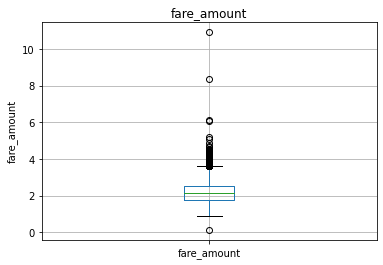

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sushi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\sushi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\sushi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\sushi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo

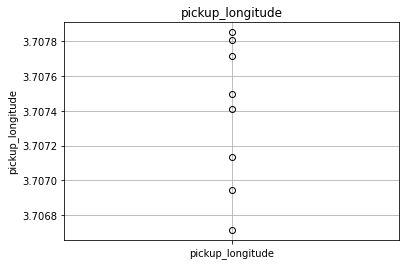

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


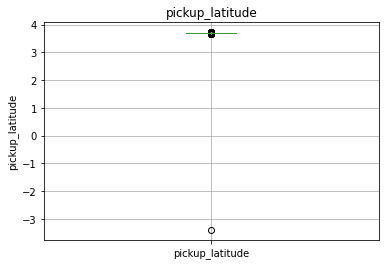

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sushi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\sushi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\sushi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\sushi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whi

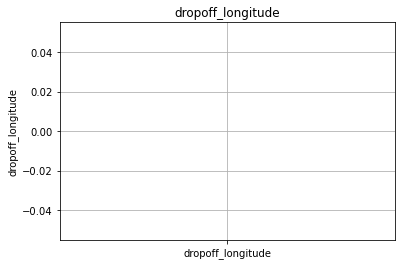

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


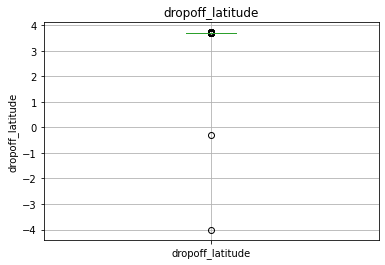

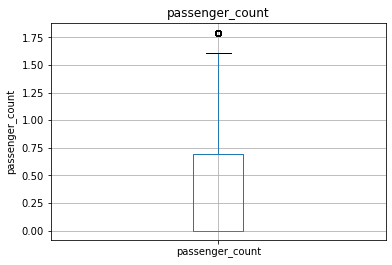

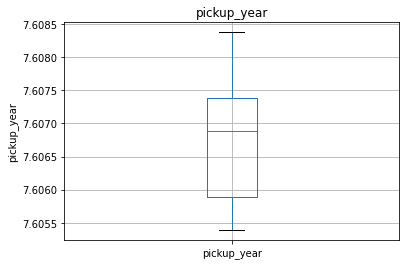

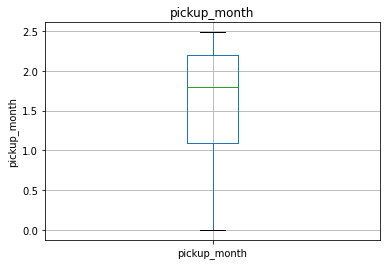

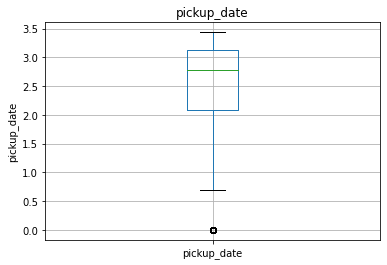

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


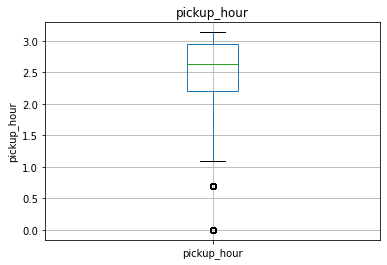

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


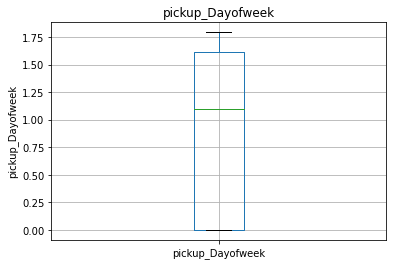

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


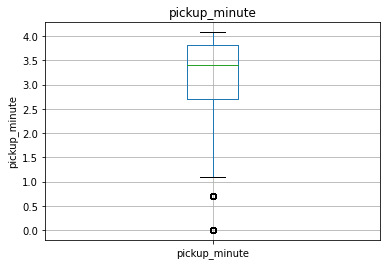

C:\Users\sushi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


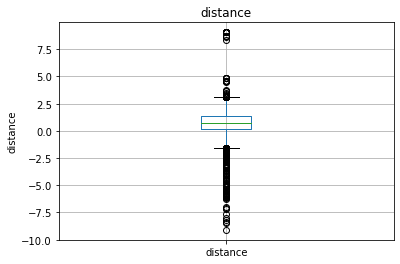

In [57]:
#Creating a Boxplot to have an overview of the outliers present in each features.
for feature in Numerical_var :
    data= df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    

#### We can see from the above box plot that there are outliers in fare_amount feature so we will filter it by taking maximum fare will be 453 above that considering them as outliers and remove them

In [58]:
#Sorting fare amount feature
df['fare_amount'].sort_values(ascending= False)

1015    54343.00
1072     4343.00
607       453.00
980       434.00
1335      180.00
          ...   
3427        2.50
958         2.50
6226        2.50
376         2.50
1427        1.14
Name: fare_amount, Length: 15982, dtype: float64

By above we cann see that there are only 2 fare amount we can treat as outliers which is 54343 and 4343 which we can remove.

In [59]:
#Outliers 54343 and 4343 is removed
df = df.drop(df[df['fare_amount']>453].index,axis=0)

#### We have also seen that there are many outliers in distance feature also, lets explore the feature 

In [60]:
#Exploring feature
df['distance'].describe()

count    15980.000000
mean        15.012390
std        310.971831
min          0.000000
25%          1.215499
50%          2.125655
75%          3.855405
max       8667.542104
Name: distance, dtype: float64

In [61]:
#Sorting the feature in descending order
df['distance'].sort_values(ascending = False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
4086        0.000000
14925       0.000000
10485       0.000000
1723        0.000000
13008       0.000000
Name: distance, Length: 15980, dtype: float64

In [62]:
#To count the no of rows values having distance more then 150
Counter(df['distance']>150)

Counter({False: 15957, True: 23})

In [63]:
#To count the no of 0 values present
Counter(df['distance']==0)

Counter({False: 15524, True: 456})

In [64]:
Counter(df_test['distance']>150)

Counter({False: 9914})

In [65]:
#To count the no of 0 values present
Counter(df_test['distance']==0)

Counter({False: 9829, True: 85})

#### We can consider the maximum distance in a city would be 150 km, above that will be treate as an outlier  and there are 23 rows we will not remove those else we can convert them in NaN and Distance equal to 0 (456 rows)will also convert in NaN value and by using median we will impute the missing values.

In [66]:
Counter(df['distance']<0)

Counter({False: 15980})

In [67]:
#Replacing with Nan value
df.loc[df['distance']>150,'distance'] =np.nan

In [68]:
#Replacing with Nan value
df.loc[df['distance']==0,'distance'] =np.nan

In [69]:
#Replacing with Nan value for test dataset
df_test.loc[df_test['distance']==0,'distance'] =np.nan

In [70]:
df_test.isnull().sum()

pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_year           0
pickup_month          0
pickup_date           0
pickup_hour           0
pickup_Dayofweek      0
pickup_minute         0
distance             85
dtype: int64

#### Now we will impute the missing values with median as this distance feature were having outliers 

In [71]:
#Imputing the missing values with median for train 
df['distance'] = df['distance'].fillna(df['distance'].median())

In [72]:
#Imputing the missing values with median for test
df_test['distance'] = df_test['distance'].fillna(df_test['distance'].median())

In [73]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_year          0
pickup_month         0
pickup_date          0
pickup_hour          0
pickup_Dayofweek     0
pickup_minute        0
distance             0
dtype: int64

## Feature Selection 

#### Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [74]:
#Remove from test dataset
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
df = df.drop(drop, axis = 1)

In [75]:
#Similarly we can remove from test dataset
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
df_test = df_test.drop(drop, axis = 1)

In [76]:
df.head()

,fare_amount,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute,distance
0,4.5,1,2009,6,15,17,0,26,1.030764
1,16.9,1,2010,1,5,16,1,52,8.450134
2,5.7,2,2011,8,18,0,3,35,1.389525
3,7.7,1,2012,4,21,4,5,30,2.799270
4,5.3,1,2010,3,9,7,1,51,1.999157


In [77]:
Numerical_var = ['fare_amount', 'passenger_count', 'pickup_year', 'pickup_month',
       'pickup_date', 'pickup_hour', 'pickup_Dayofweek', 'pickup_minute',
       'distance']

## Data Visualization (To get some Insights)

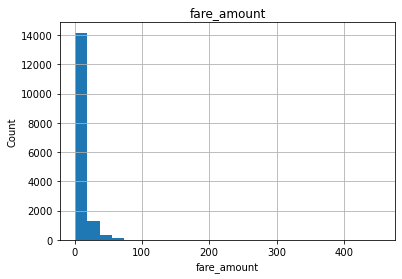

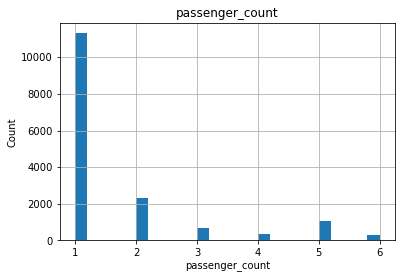

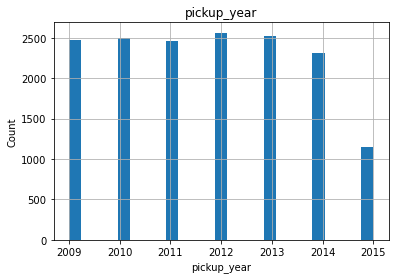

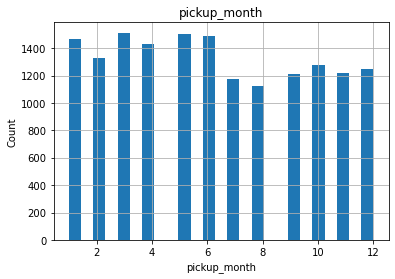

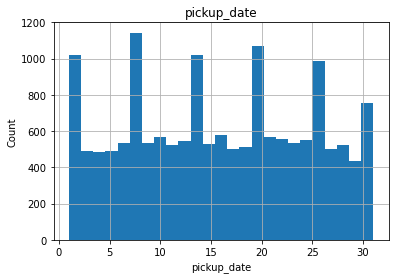

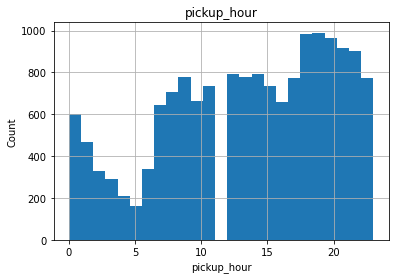

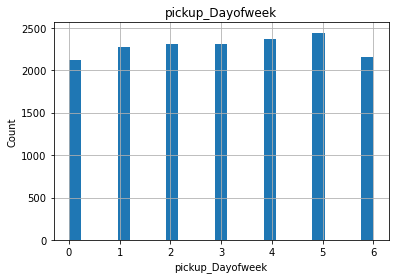

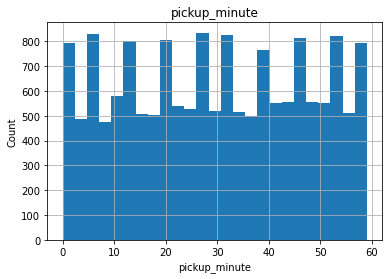

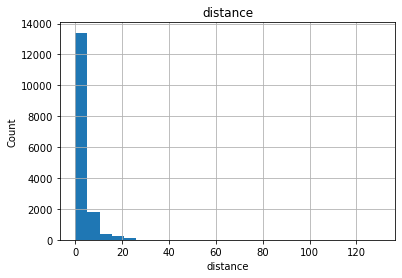

In [78]:
    #Lets check the distribution of the features
for var in Numerical_var:
    data = df.copy()
    data[var].hist(bins=25)
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.title(var)
    plt.show()

#### Relationship between target variaable and independent variables

In [79]:
#Lets craete a list of variable which can have effect on fare amount
Imp_Var = ['passenger_count','pickup_month','pickup_hour','pickup_Dayofweek','distance']

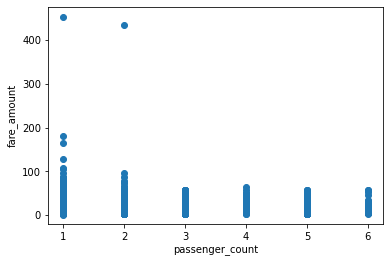

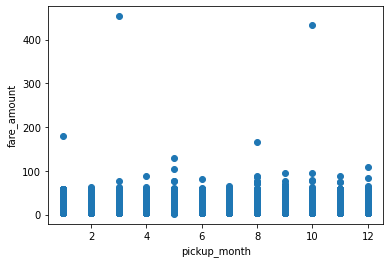

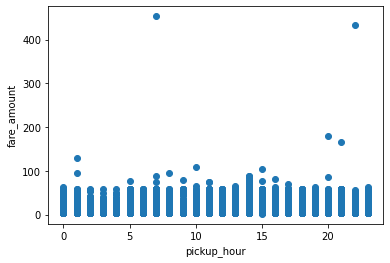

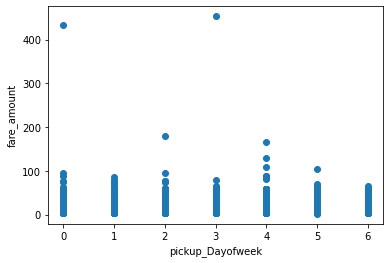

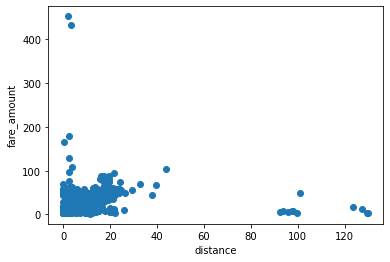

In [80]:
for feature in Imp_Var :
    plt.scatter(df[feature],df['fare_amount'])
    plt.xlabel(feature)
    plt.ylabel("fare_amount")
    plt.show()
    

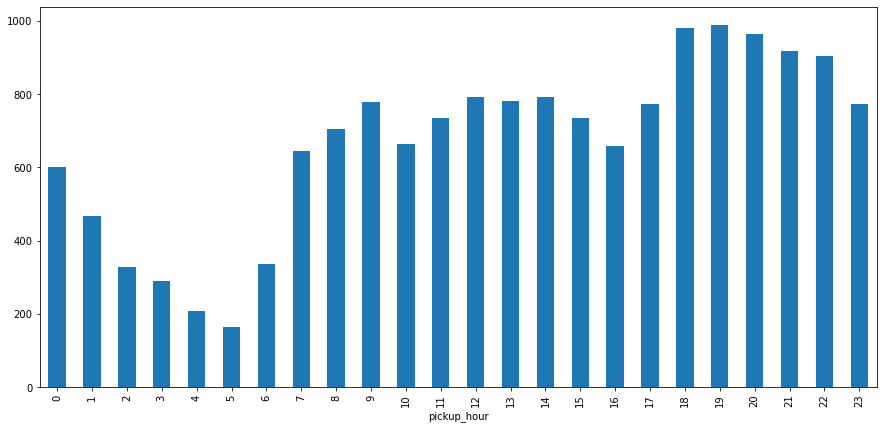

In [81]:


plt.figure(figsize=(15,7))
df.groupby(df["pickup_hour"])['pickup_hour'].count().plot(kind="bar")
plt.show()



### Insights

#### Affect of passenger count on fare amount :-

    1. Single passenger frequency is High that means maximum trip were having Single passenger.
    2. The highest fare also seems to come from cabs which carry  1 and 2 no of passengers.

#### Affect of  time of pickup on fare amount :-

    1. Maximum trips were in between 6pm to 10pm (Frequency of trips).
    2. Minimum trips were at 5am.
    3. The fares, however, seem to be high between 7AM and 10AM, between 2PM to 4PM and 8PM-9PM

#### Affect of  day of the week  on fare amount :-

    1. The frequency is uniform throughout the week.
    2. The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Saturday. 
    
#### Affect of distance on fare amount :-

    1. Maximum trips were in between 0.1-20KM (Frequency of distancen of trips).
    2. We can see in the graph, there is a linear co-relation between distance and fare amount,as distance will increace the fare will also increase.
    

In [82]:
df.head()

,fare_amount,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute,distance
0,4.5,1,2009,6,15,17,0,26,1.030764
1,16.9,1,2010,1,5,16,1,52,8.450134
2,5.7,2,2011,8,18,0,3,35,1.389525
3,7.7,1,2012,4,21,4,5,30,2.799270
4,5.3,1,2010,3,9,7,1,51,1.999157


## Feature Scaling 

fare_amount


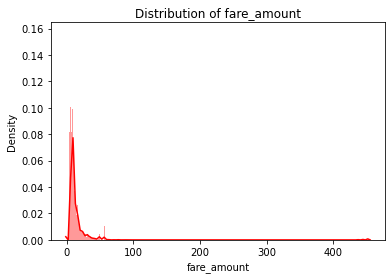

distance


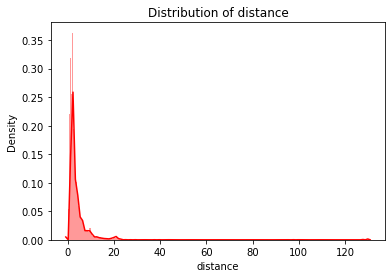

In [83]:
#Normality check of distance feature in training set
    for i in ['fare_amount', 'distance']:
        print(i)
        sns.distplot(df[i],bins='auto',color='red')
        plt.title("Distribution of "+i)
        plt.ylabel("Density")
        plt.show()

In [84]:
#There is some skewness present on distance feature hence applying log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

In [85]:
#There is some skewness present on distance feature hence applying log transform to reduce the skewness-
df['fare_amount'] = np.log1p(df['fare_amount'])

Here i am using the log1p instead of log,because log will have some error in case of zero   log1p = calculate natural logarithmic value of x+1

fare_amount


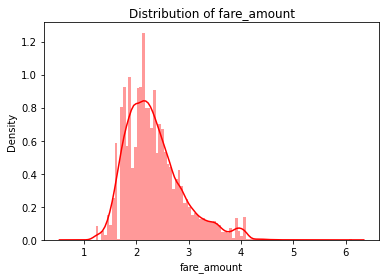

distance


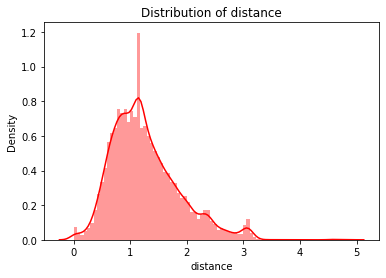

In [86]:
#Normality check after log transformation
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='red')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

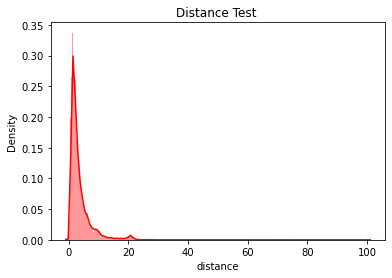

In [87]:
##Normality check of distance feature in test set
sns.distplot(df_test['distance'],bins='auto',color='red')
plt.title("Distance Test ")
plt.ylabel("Density")
plt.show()

In [88]:
#There is some skewness present on distance feature hence applying log transform to reduce the skewness-
df_test['distance'] = np.log1p(df_test['distance'])

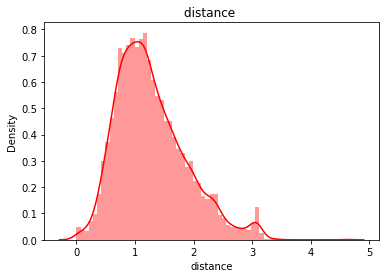

In [89]:
##Normality check of distance feature in test set after normalization
sns.distplot(df_test['distance'],bins='auto',color='red')
plt.title("distance ")
plt.ylabel("Density")
plt.show()

#### Now our continous variables are normally distributed.

In [90]:
#saving data of preprocessing in final 
df.to_csv("final_df1.csv",index= False)
df_final = df.copy()


## Model Development

In [91]:
#Below libraries are impored for our ML Algos
from sklearn.model_selection import train_test_split      # to split train and test
import statsmodels.api as sm                              #for linear regression
from sklearn.tree import DecisionTreeRegressor            #for decision tree algo
from sklearn.ensemble import RandomForestRegressor        #for random forest algo
from sklearn.ensemble import GradientBoostingRegressor    #for gradient boost algo
from sklearn.metrics import mean_squared_error            #for calculating rmse
from sklearn.metrics import r2_score                      #for calculating r2 score

In [92]:
df.head()

,fare_amount,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute,distance
0,1.704748,1,2009,6,15,17,0,26,0.708412
1,2.884801,1,2010,1,5,16,1,52,2.246029
2,1.902108,2,2011,8,18,0,3,35,0.871095
3,2.163323,1,2012,4,21,4,5,30,1.334809
4,1.840550,1,2010,3,9,7,1,51,1.098331


In [93]:
#train and test split , where 80% will be our train data and 20% is test set
X = df.iloc[:,1:]
Y = df['fare_amount']
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [94]:
X_train
X_test
y_train
y_test


14796    1.504077
5548     1.704748
16032    2.014903
13733    2.687847
1903     1.547563
           ...   
10644    1.791759
14323    1.840550
4176     3.299534
4795     2.332144
7686     2.116256
Name: fare_amount, Length: 3196, dtype: float64

## Linear Regression

In [95]:
#Model creation
model_Linear = sm.OLS(y_train, X_train).fit()

In [96]:
#prediction on train data
prediction_train_OLS = model_Linear.predict(X_train)

In [97]:
#prediction on test data
prediction_test_OLS = model_Linear.predict(X_test)

In [98]:
# R^2 for train data
r2_score(y_train,prediction_train_OLS)

0.7017848923676313

In [99]:
## R^2 for test data
r2_score(y_test,prediction_test_OLS)

0.7254010475435706

In [100]:
# RMSE for train data
RMSE_train_OLS = np.sqrt(mean_squared_error(y_train, prediction_train_OLS))

In [101]:
RMSE_train_OLS

0.2974607873184781

In [102]:
# RMSE for test data
RMSE_test_OLS = np.sqrt(mean_squared_error(y_test, prediction_test_OLS))

In [103]:
RMSE_test_OLS

0.2948419503146429

## Random Forest Model :-

In [104]:
#Model creation
model_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

In [105]:
#prediction on train data
prediction_train_RF = model_RF.predict(X_train)

In [106]:
#prediction on test data
prediction_test_RF = model_RF.predict(X_test)

In [107]:
# R^2 for train data
r2_score(y_train, prediction_train_RF)

0.9653160011792044

In [108]:
# R^2 for train data
r2_score(y_test, prediction_test_RF)

0.7722229429167504

In [109]:
# RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, prediction_train_RF))

In [110]:
RMSE_train_RF

0.1014447284452336

In [111]:
# RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, prediction_test_RF))

In [112]:
RMSE_test_RF

0.26853124536206335

## Decision tree

In [113]:
#Model creation
model_DT = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [114]:
#prediction on train data
prediction_train_DT = model_DT.predict(X_train)

In [115]:
#prediction on test data
prediction_test_DT = model_DT.predict(X_test)

In [116]:
# R^2 for train data
r2_score(y_train, prediction_train_DT)

0.6689488270768565

In [117]:
# R^2 for test data
r2_score(y_test, prediction_test_DT)

0.6841042396184283

In [118]:
#calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, prediction_train_DT))

In [119]:
RMSE_train_DT

0.31340972474800116

In [120]:
#calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, prediction_test_DT))

In [121]:
RMSE_test_DT

0.3162363115084486

## Gradient Boosting :-

In [122]:
#Model creation
model_GB = GradientBoostingRegressor().fit(X_train,y_train)

In [123]:
#prediction on train data
prediction_train_GB = model_GB.predict(X_train)

In [124]:
#prediction on test data
prediction_test_GB = model_GB.predict(X_test)

In [125]:
# R^2 for train data
r2_score(y_train,prediction_train_GB)

0.7898874413272966

In [126]:
# R^2 for train data
r2_score(y_test,prediction_test_GB)

0.7909996476043311

In [127]:
# RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, prediction_train_GB))

In [128]:
RMSE_train_GB

0.24968411214002542

In [129]:
# RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, prediction_test_GB))

In [130]:
RMSE_test_GB

0.25722510099438073

#### We have seen the performances of all the above regression algorithms , i have been using the default parameters in this case but we can get more good results by using hyperparameter tuning in the above algorithms specially random forest and gradient boosting regression, we can use randamized search CV and Grid search CV to optimize the results as those will extract the parameter which will be give us best results .

## Prediction for our test dataset 

#### Here we can see that the Gradient Boosing is giving us best results amongs all so we will use this to predict for our test dataset provided to predict the fare_amount

In [131]:
# we are using the model_GB model created above to predict the test case.
final_prediction = model_GB.predict(df_test)

In [132]:
final_prediction

array([2.40732606, 2.44362329, 1.70499765, ..., 3.87158345, 3.17417514,
       1.9976788 ])

In [133]:
#Creating a new variable for fare amount as final_pred_fare
df_test['final_pred_fare']= final_prediction

In [134]:
df_test.head()

,passenger_count,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_Dayofweek,pickup_minute,distance,final_pred_fare
0,1,2015,1,27,13,1,8,1.200946,2.407326
1,1,2015,1,27,13,1,8,1.231205,2.443623
2,1,2011,10,8,11,5,53,0.481579,1.704998
3,1,2012,12,1,21,5,12,1.085538,2.184725
4,1,2012,12,1,21,5,12,1.854312,2.768262


In [135]:
df_test.to_csv("final_pred.csv",index=False)